In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
eps = 10e-4

In [205]:
def f1(x):
    return 3 * (x ** 4) + 8 * (x ** 3) + 10


def f2(x):
    return np.exp(x) - 2 * ( (x - 1) ** 2 )

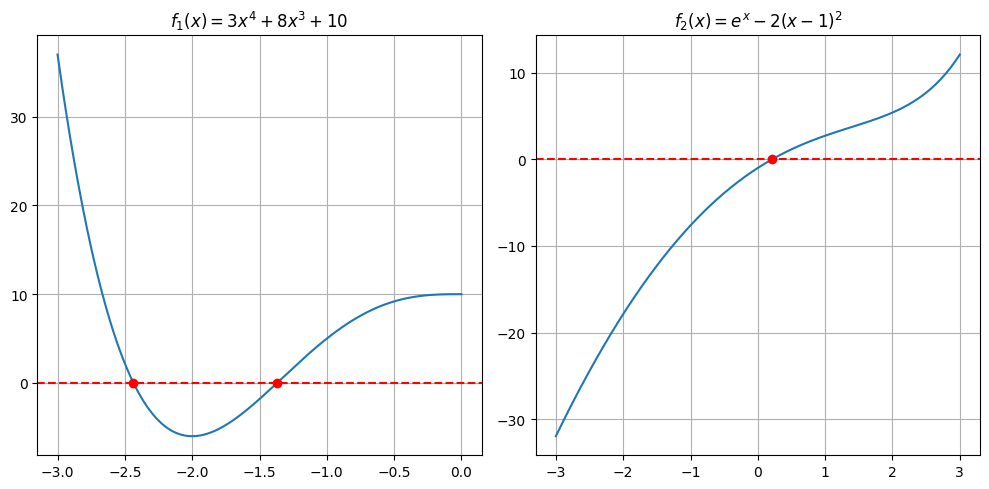

{'Корни f1': array([-2.436, -1.37 ]), 'Корни f2': array([0.213])}

In [206]:
x = np.linspace(-3, 0, 10000)
y1 = f1(x)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
roots = {'Корни f1': None, 'Корни f2': None }
ax1.plot(x, y1)
zero_indices = np.where(np.diff(np.sign(y1)))[0]
ax1.plot(x[zero_indices], y1[zero_indices], 'ro', label='Zero points')
ax1.grid()
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_title(r'$f_1(x)=3x^4 + 8x^3 + 10$')

roots['Корни f1'] = (np.round(x[zero_indices], 3))

x = np.linspace(-3, 3, 10000)
y2 = f2(x)
ax2.plot(x, y2)
zero_indices = np.where(np.diff(np.sign(y2)))[0]
ax2.plot(x[zero_indices], y2[zero_indices], 'ro', label='Zero points')
ax2.grid()
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title(r'$f_2(x)=e^x - 2(x - 1)^2$')
plt.tight_layout()
plt.show()

roots['Корни f2'] = (np.round(x[zero_indices], 3))
roots

Метод половинного деления

In [207]:
def bisection(f, a, b):
    data = []
    while np.abs(a - b) > eps:
        x0 = (a + b) / 2
        data.append([a, b, x0, f(a), f(b), f(x0)])
        if(f(a) * f(x0)) < 0:
            b = x0
        else:
            a = x0
    df=pd.DataFrame(data=data, columns=['a', 'b', 'x0', 'f(a)', 'f(b)', 'f(x0)'])
    return np.round(x0, 3), df

In [208]:
bisection(f1, -3, -2)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-3.0000,-2.000000,-2.500000,37.000000,-6.000000,2.187500
1,-2.5000,-2.000000,-2.250000,2.187500,-6.000000,-4.238281
2,-2.5000,-2.250000,-2.375000,2.187500,-4.238281,-1.721924
3,-2.5000,-2.375000,-2.437500,2.187500,-1.721924,0.043503
4,-2.4375,-2.375000,-2.406250,0.043503,-1.721924,-0.884595
5,-2.4375,-2.406250,-2.421875,0.043503,-0.884595,-0.432132
6,-2.4375,-2.421875,-2.429688,0.043503,-0.432132,-0.197241
7,-2.4375,-2.429688,-2.433594,0.043503,-0.197241,-0.077604
8,-2.4375,-2.433594,-2.435547,0.043503,-0.077604,-0.017235
9,-2.4375,-2.435547,-2.436523,0.043503,-0.017235,0.013088


In [209]:
bisection(f1, -2, -1)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-2.000000,-1.000000,-1.500000,-6.000000,5.000000,-1.812500
1,-1.500000,-1.000000,-1.250000,-1.812500,5.000000,1.699219
2,-1.500000,-1.250000,-1.375000,-1.812500,1.699219,-0.073486
3,-1.375000,-1.250000,-1.312500,-0.073486,1.699219,0.814743
4,-1.375000,-1.312500,-1.343750,-0.073486,0.814743,0.370379
5,-1.375000,-1.343750,-1.359375,-0.073486,0.370379,0.148291
6,-1.375000,-1.359375,-1.367188,-0.073486,0.148291,0.037351
7,-1.375000,-1.367188,-1.371094,-0.073486,0.037351,-0.018082
8,-1.371094,-1.367188,-1.369141,-0.018082,0.037351,0.009631
9,-1.371094,-1.369141,-1.370117,-0.018082,0.009631,-0.004226


In [210]:
bisection(f2, -1, 1)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-1.000000,1.000000,0.000000,-7.632121,2.718282,-1.000000
1,0.000000,1.000000,0.500000,-1.000000,2.718282,1.148721
2,0.000000,0.500000,0.250000,-1.000000,1.148721,0.159025
3,0.000000,0.250000,0.125000,-1.000000,0.159025,-0.398102
4,0.125000,0.250000,0.187500,-0.398102,0.159025,-0.114082
5,0.187500,0.250000,0.218750,-0.114082,0.159025,0.023817
6,0.187500,0.218750,0.203125,-0.114082,0.023817,-0.044794
7,0.203125,0.218750,0.210938,-0.044794,0.023817,-0.010404
8,0.210938,0.218750,0.214844,-0.010404,0.023817,0.006728
9,0.210938,0.214844,0.212891,-0.010404,0.006728,-0.001833


Метод секущих 

In [211]:
def secant(a, b, f):
    data=[]
    x0=a-f(a) * (b-a) / (f(b) - f(a))
    while abs(a - b) > eps and abs(a - x0) > eps and abs(b - x0) > eps:
        data.append([a, b, x0, f(a), f(b), f(x0)])
        if f(a) * f(x0) < 0:
            b = x0
        else:
            a = x0
        x0 = a - f(a) * (b - a) / (f(b) - f(a))
    df=pd.DataFrame(data=data, columns=['a', 'b', 'x0', 'f(a)', 'f(b)', 'f(x0)'])
    return np.round(x0, 3), df


In [212]:
secant(-3, -2, f1)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-3,-2.000000,-2.139535,37,-6.000000,-5.488115
1,-3,-2.139535,-2.250680,37,-5.488115,-4.227942
2,-3,-2.250680,-2.327523,37,-4.227942,-2.828831
3,-3,-2.327523,-2.375285,37,-2.828831,-1.714680
4,-3,-2.375285,-2.402954,37,-1.714680,-0.977126
5,-3,-2.402954,-2.418316,37,-0.977126,-0.537225
6,-3,-2.418316,-2.426641,37,-0.537225,-0.289544
7,-3,-2.426641,-2.431093,37,-0.289544,-0.154379
8,-3,-2.431093,-2.433456,37,-0.154379,-0.081837
9,-3,-2.433456,-2.434707,37,-0.081837,-0.043250


In [213]:
secant(-2, -1, f1)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-2.000000,-1.000000,-1.454545,-6.000000,5.000000,-1.190492
1,-1.454545,-1.000000,-1.367132,-1.190492,5.000000,0.038141
2,-1.454545,-1.367132,-1.369845,-1.190492,0.038141,-0.000371


In [214]:
secant(-1, 1, f2)[1]

,a,b,x0,f(a),f(b),f(x0)
0,-1,1.000000,0.474749,-7.632121,2.718282,1.055832
1,-1,0.474749,0.295525,-7.632121,1.055832,0.351261
2,-1,0.295525,0.238523,-7.632121,0.351261,0.109679
3,-1,0.238523,0.220977,-7.632121,0.109679,0.033540
4,-1,0.220977,0.215635,-7.632121,0.033540,0.010191
5,-1,0.215635,0.214014,-7.632121,0.010191,0.003090


Метод простой итерации

In [215]:
# f1(x): 3 * (x ** 4) + 8 * (x ** 3) + 10
# f2(x): np.exp(x) - 2 * ( (x - 1) ** 2 )
def g1(x):
    return ((-8 * x ** 3 - 10) / (3 * x ** 3))


def g2(x):
    return (2 - np.exp(x) + 2 * x ** 2) / 4


def msi(x0, f, tol=eps, max_iter=100):
    val_f = []
    
    x1 = f(x0)
    val_f.append([round(x0.real, 4), round(x1.real, 4)])
    
    k = 1
    for i in range(max_iter):
        k += 1
        x0 = x1
        x1 = f(x0)
        
        val_f.append([round(x0.real, 4), round(x1.real, 4)])
        
        if abs(x1 - x0) < tol:
            break
    
    if k < max_iter:
        return pd.DataFrame(data=val_f, columns=['x', 'g(x)'])
    else:
        return 'Не сходится'

In [216]:
x0_1_1 = -1.37
msi(x0_1_1, g1)

,x,g(x)
0,-1.3700,-1.3703
1,-1.3703,-1.3713


In [217]:
x0_1_2 = -2
msi(x0_1_2, g1)

,x,g(x)
0,-2.0000,-2.2500
1,-2.2500,-2.3740
2,-2.3740,-2.4175
3,-2.4175,-2.4308
4,-2.4308,-2.4346
5,-2.4346,-2.4357
6,-2.4357,-2.4360


In [218]:
x0_2 = 0
msi(x0_2, g2)

,x,g(x)
0,0.0000,0.2500
1,0.2500,0.2102
2,0.2102,0.2136
3,0.2136,0.2133


Метод Ньютона

In [219]:
# f1(x): 3 * (x ** 4) + 8 * (x ** 3) + 10
# f2(x): np.exp(x) - 2 * ( (x - 1) ** 2 )
def g1(x):
    return ((-8 * x ** 3 - 10) / (3 * x ** 3))


def g2(x):
    return (2 - np.exp(x) + 2 * x ** 2) / 4



def div_f1(x):
    return 4 * (x ** 3) + 3


def div_f2(x):
    return np.exp(x) - 4 * (x - 1)
    

In [220]:
def newton(x, f, div_f, g):
    data = [[x, g(x)]]
    while len(data) <= 3 or abs(data[-1][0] - data[-2][0]) / (1 - (data[-1][0] - data[-2][0]) / (data[-2][0] - data[-3][0])) > eps:
        x = x - f(x) / div_f(x)
        data.append([x, g(x)])
    df=pd.DataFrame(data=data, columns=['x', 'g(x)'])
    return np.round(x, 3), df

In [221]:
newton(-2, f1, div_f1, g1)[1]

,x,g(x)
0,-2.000000,-2.250000
1,-2.206897,-2.356544
2,-2.327552,-2.402316
3,-2.387171,-2.421632
4,-2.414524,-2.429865
5,-2.426678,-2.433406
6,-2.432003,-2.434934
7,-2.434323,-2.435596
8,-2.435330,-2.435883
9,-2.435767,-2.436007


In [222]:
newton(-1.37, f1, div_f1, g1)[1]

,x,g(x)
0,-1.370000,-1.370332
1,-1.370352,-1.371330
2,-1.371388,-1.374264
3,-1.374429,-1.382824


In [223]:
newton(0, f2, div_f2, g2)[1]

,x,g(x)
0,0.000000,0.250000
1,0.200000,0.214649
2,0.213253,0.213314
3,0.213309,0.213309


Модифифированный метод Ньютона

In [224]:
def mod_newton(x, f, div_f, g):
    x0 = x
    data = []
    while len(data) <= 3 or abs(data[-1][0] - data[-2][0]) / (1 - (data[-1][0] - data[-2][0]) / (data[-2][0] - data[-3][0])) > eps:
        data.append([x, g(x)])
        x = x - f(x) / div_f(x0)
    df=pd.DataFrame(data=data, columns=['x', 'g(x)'])
    return np.round(x, 3), df

In [225]:
mod_newton(-2, f1, div_f1, g1)[1]

,x,g(x)
0,-2.000000,-2.250000
1,-2.206897,-2.356544
2,-2.373291,-2.417307
3,-2.434159,-2.435550
4,-2.436234,-2.436140
5,-2.436093,-2.436100


In [226]:
newton(-1.37, f1, div_f1, g1)[1]

,x,g(x)
0,-1.370000,-1.370332
1,-1.370352,-1.371330
2,-1.371388,-1.374264
3,-1.374429,-1.382824


In [227]:
newton(0, f2, div_f2, g2)[1]

,x,g(x)
0,0.000000,0.250000
1,0.200000,0.214649
2,0.213253,0.213314
3,0.213309,0.213309
